In [1]:
pip install pandas numpy seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Dataset
df = pd.read_csv("netflix_titles.csv")

In [6]:
# shows first 5 rows to understand
df.head()       

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
#summary of columns , data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
print(f"Rows: {df.shape[0]} , Columns: {df.shape[1]}")

Rows: 8807 , Columns: 12


In [11]:
# Missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
# Fill missin values
df['director'].fillna("No Director", inplace = True)
df['cast'].fillna("No Cast Info", inplace = True)
df['country'].fillna("Unknown", inplace = True)

# Drop rows where date_added is missing
df.dropna(subset=['date_added'], inplace = True)
#other drops
df.dropna(subset=['rating', 'duration'], inplace = True)

In [19]:
# convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'] , errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

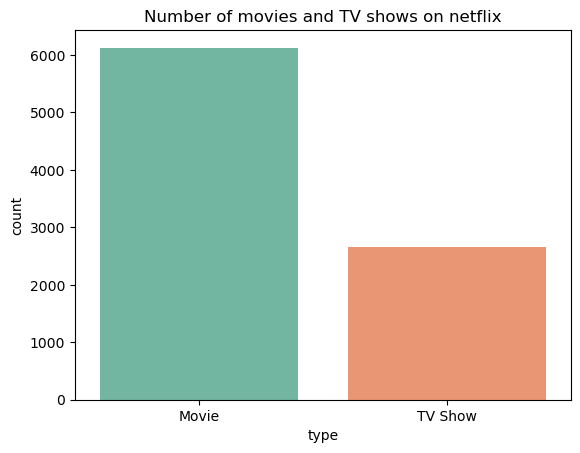

In [49]:
sns.countplot(data = df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Number of movies and TV shows on netflix')
plt.show()

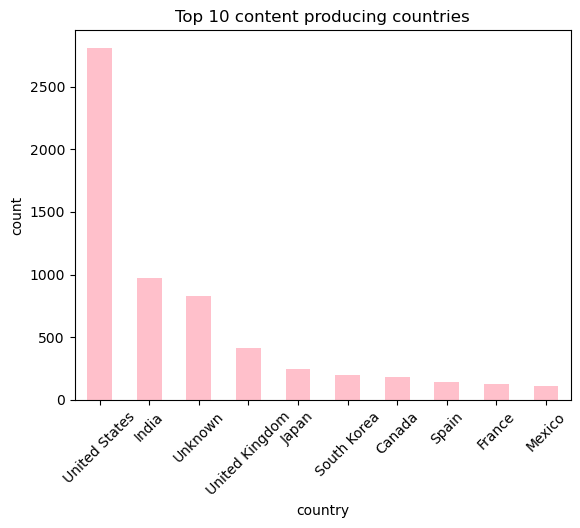

In [50]:
top_countries= df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='pink')
plt.title('Top 10 content producing countries')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

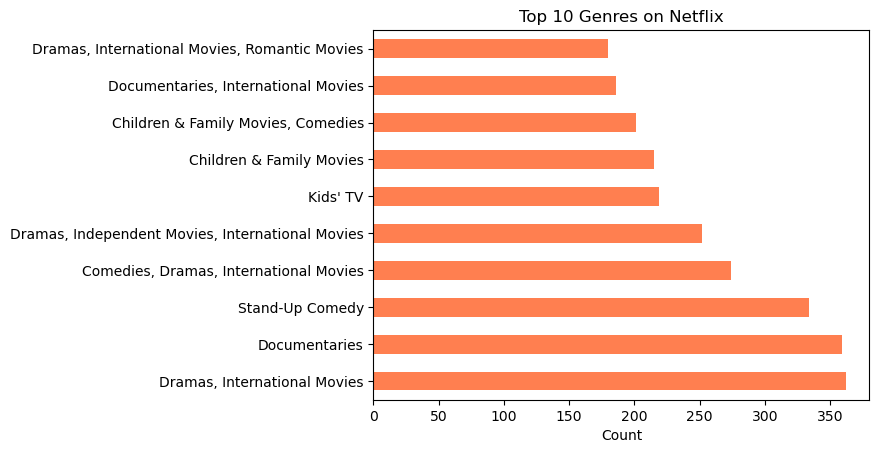

In [51]:
from collections import Counter

genres = df['listed_in'].str.split(' ,  ')
genre_list = [genre for sublist in genres.dropna() for genre in sublist]
genre_counts = Counter(genre_list)

pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.show()

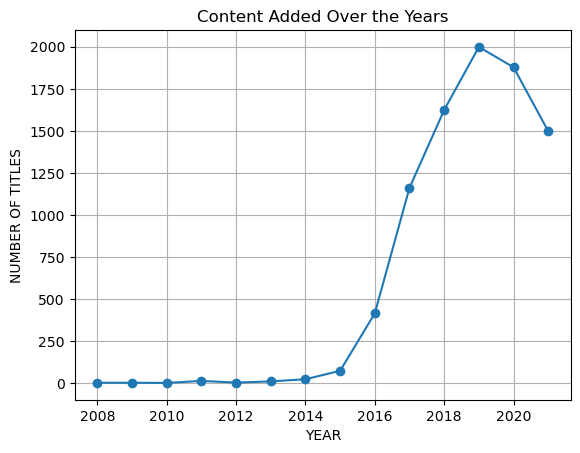

In [52]:
# content added over the years
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added Over the Years')
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF TITLES')
plt.grid(True)
plt.show()

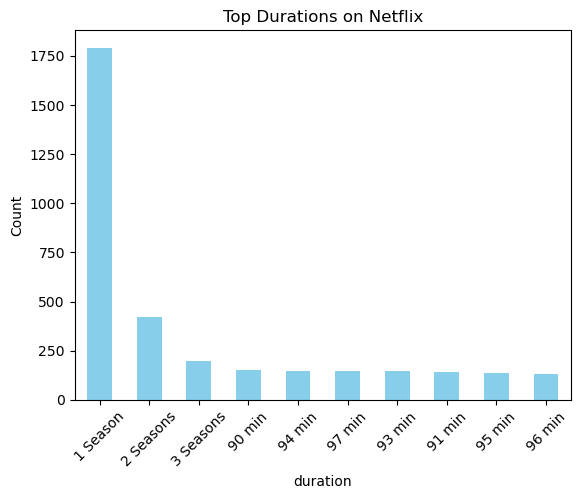

In [53]:
#distribution of duration
df['duration'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top Durations on Netflix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [54]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


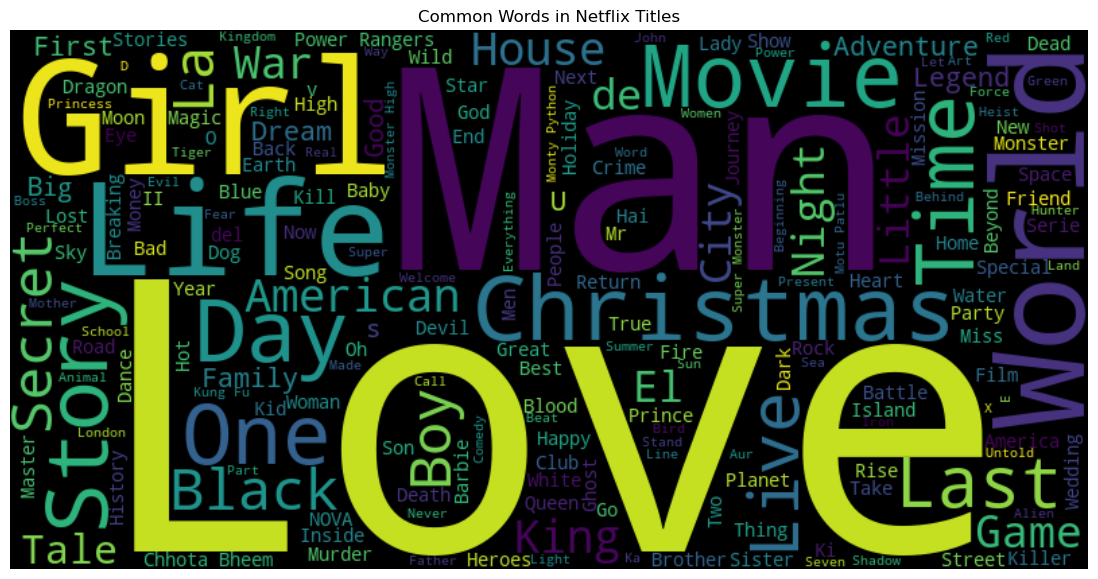

In [55]:
from wordcloud import WordCloud

title_words = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800 , height=400 , background_color='black').generate(title_words)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Netflix Titles")
plt.show()

In [48]:
df.groupby('type')['rating'].value_counts().unstack().fillna(0)

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,
Movie,41.0,3.0,75.0,287.0,490.0,797.0,1427.0,126.0,2062.0,540.0,131.0,139.0,5.0,3.0
TV Show,0.0,0.0,4.0,0.0,0.0,2.0,730.0,94.0,1143.0,321.0,175.0,194.0,1.0,0.0
